##Q1. What is Simple Linear Regression?

Ans:
Simple Linear Regression is a statistical method used to model the relationship between two variables: one independent variable (predictor, X) and one dependent variable (response, Y). The relationship is represented by a straight line

##Q2. What are the key assumptions of Simple Linear Regression?

Answer:The key assumptions of simple linear regression:

Linearity: The relationship between X and Y is linear.

Independence: Observations are independent of each other.

Homoscedasticity: The variance of residuals is constant across values of X.

Normality of Errors: Residuals are normally distributed.

No Multicollinearity: Not relevant here since we only use one predictor.


##Q3. What is heteroscedasticity, and why is it important to address?

Answer:

Heteroscedasticity occurs when the variance of residuals is not constant across all values of X (e.g., errors spread out more for higher values).

Importance:
It violates regression assumptions.
Leads to inefficient estimates and biased statistical tests (incorrect confidence intervals and p-values).
It can reduce model reliability.

###Q4. What is Multiple Linear Regression?

Answer:
Multiple Linear Regression models the relationship between one dependent variable (Y) and two or more independent variables (X₁, X₂, …, Xₙ).

###Q5.What is Polynomial Regression, and how does it differ from Linear Regression?

Answer:

Polynomial Regression is an extension of linear regression where the relationship between X and Y is modeled as an nth-degree polynomial.

Difference: Linear regression fits a straight line, while polynomial regression fits a curve to capture non-linear relationships.




###Question 6: Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
Plot the regression line over the data points

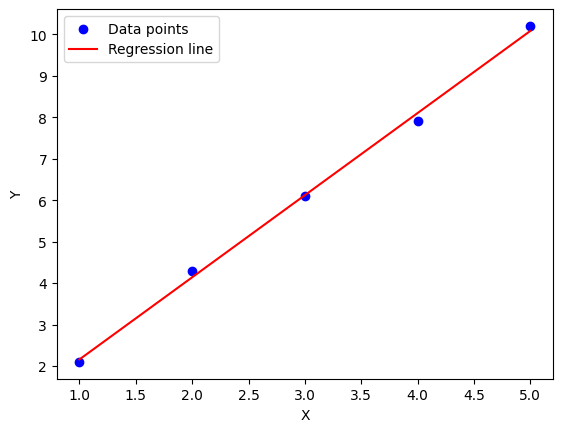

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Plot
plt.scatter(X, Y, color='blue', label="Data points")
plt.plot(X, Y_pred, color='red', label="Regression line")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


In [ ]:
##Question 7: Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.
(Include your Python code and output in the code box be


In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
data = pd.DataFrame({
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
})

X = data[["Area", "Rooms"]]
Y = data["Price"]

# Add constant
X_const = sm.add_constant(X)

# Fit model
model = sm.OLS(Y, X_const).fit()
print(model.summary())

# VIF calculation
vif = pd.DataFrame()
vif["Variable"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
print(vif)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Fri, 19 Sep 2025   Prob (F-statistic):             0.0377
Time:                        15:23:29   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


###Question 8: Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
3
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.
(Include your Python code and output in the code box below.)

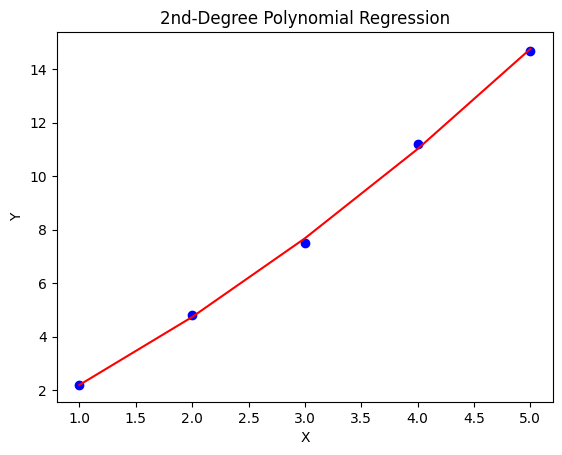

In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Model
model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd-Degree Polynomial Regression")
plt.show()


###Question 9: Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.
(Include your Python code and output in the code box below.)

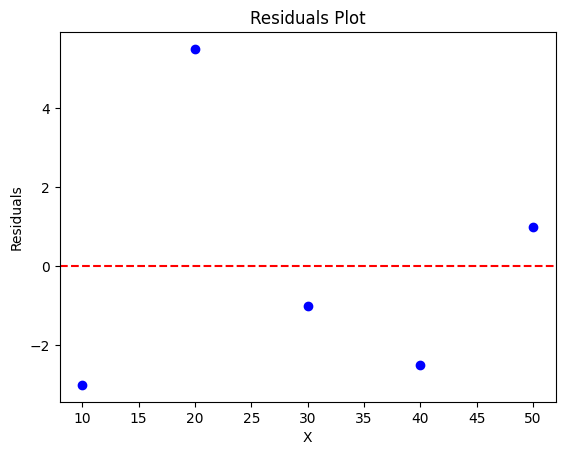

In [4]:
# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("X")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()


###Question 10: Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


Ans:
To ensure a robust model:Addressing Heteroscedasticity,Using weighted least squares (WLS).

Apply transformations (log, square root) on Y or predictors.

Use robust standard errors.

Addressing Multicollinearity:

Check VIF and remove highly correlated predictors.

Combine correlated features (e.g., PCA or feature engineering).

Regularization (Ridge/Lasso regression).

Final Steps:

Validate model with cross-validation.

Ensure assumptions are met before interpretation.